
# <span style="color:rgb(213,80,0)">Analysis of consistency factor (small sample and asymptotic for MAD)</span>

This file creates Figure 1.1

## Empirical consisteny factor for MAD when n=5

Take n observations from N(0,1) and compute the MAD Repeat the experiment nsimul times and compute the average of the MADs


In [1]:
nsimul=1000000;
n=5;
MAD=zeros(nsimul,1);
for j=1:nsimul
    x=randn(n,1);
    MAD(j)=mad(x,1);
end
Mea=mean(MAD);
disp(Mea)

          0.55

## Prepare the input data for Figure 1.1

Repeat the previous simulation study for each value of nn=5, 6, ..., 100


In [2]:
nsimul=1000000;
nn=5:100;
% nn=100; just n=100
maxnn=nn(end);
minnn=nn(1);
MADall=NaN(maxnn-minnn+1,1);

for i=nn
    MAD=zeros(nsimul,1);

    parfor j=1:nsimul
        % x=randn(i,1);
        MAD(j)=mad(randn(i,1),1);
    end
    Mea=mean(MAD);
    MADall(i-minnn+1)=Mea;
    disp(['sample size n=' num2str(i)])
end

Starting parallel pool (parpool) using the 'Processes' profile ...
Connected to parallel pool with 24 workers.
sample size n=5
sample size n=6
sample size n=7
sample size n=8
sample size n=9
sample size n=10
sample size n=11
sample size n=12
sample size n=13
sample size n=14
sample size n=15
sample size n=16
sample size n=17
sample size n=18
sample size n=19
sample size n=20
sample size n=21
sample size n=22
sample size n=23
sample size n=24
sample size n=25
sample size n=26
sample size n=27
sample size n=28
sample size n=29
sample size n=30
sample size n=31
sample size n=32
sample size n=33
sample size n=34
sample size n=35
sample size n=36
sample size n=37
sample size n=38
sample size n=39
sample size n=40
sample size n=41
sample size n=42
sample size n=43
sample size n=44
sample size n=45
sample size n=46
sample size n=47
sample size n=48
sample size n=49
sample size n=50
sample size n=51
sample size n=52
sample size n=53
sample size n=54
sample size n=55
sample size n=56
sample siz

In [3]:

disp('Empirical consistenty factor when n=100')

Empirical consistenty factor when n=100

In [4]:
disp(1./MADall(end))

1.49

In [5]:
% Using nsimul=100,000,000 when n=100
% the empirical consistency factor is 1.4942

## Plotting part


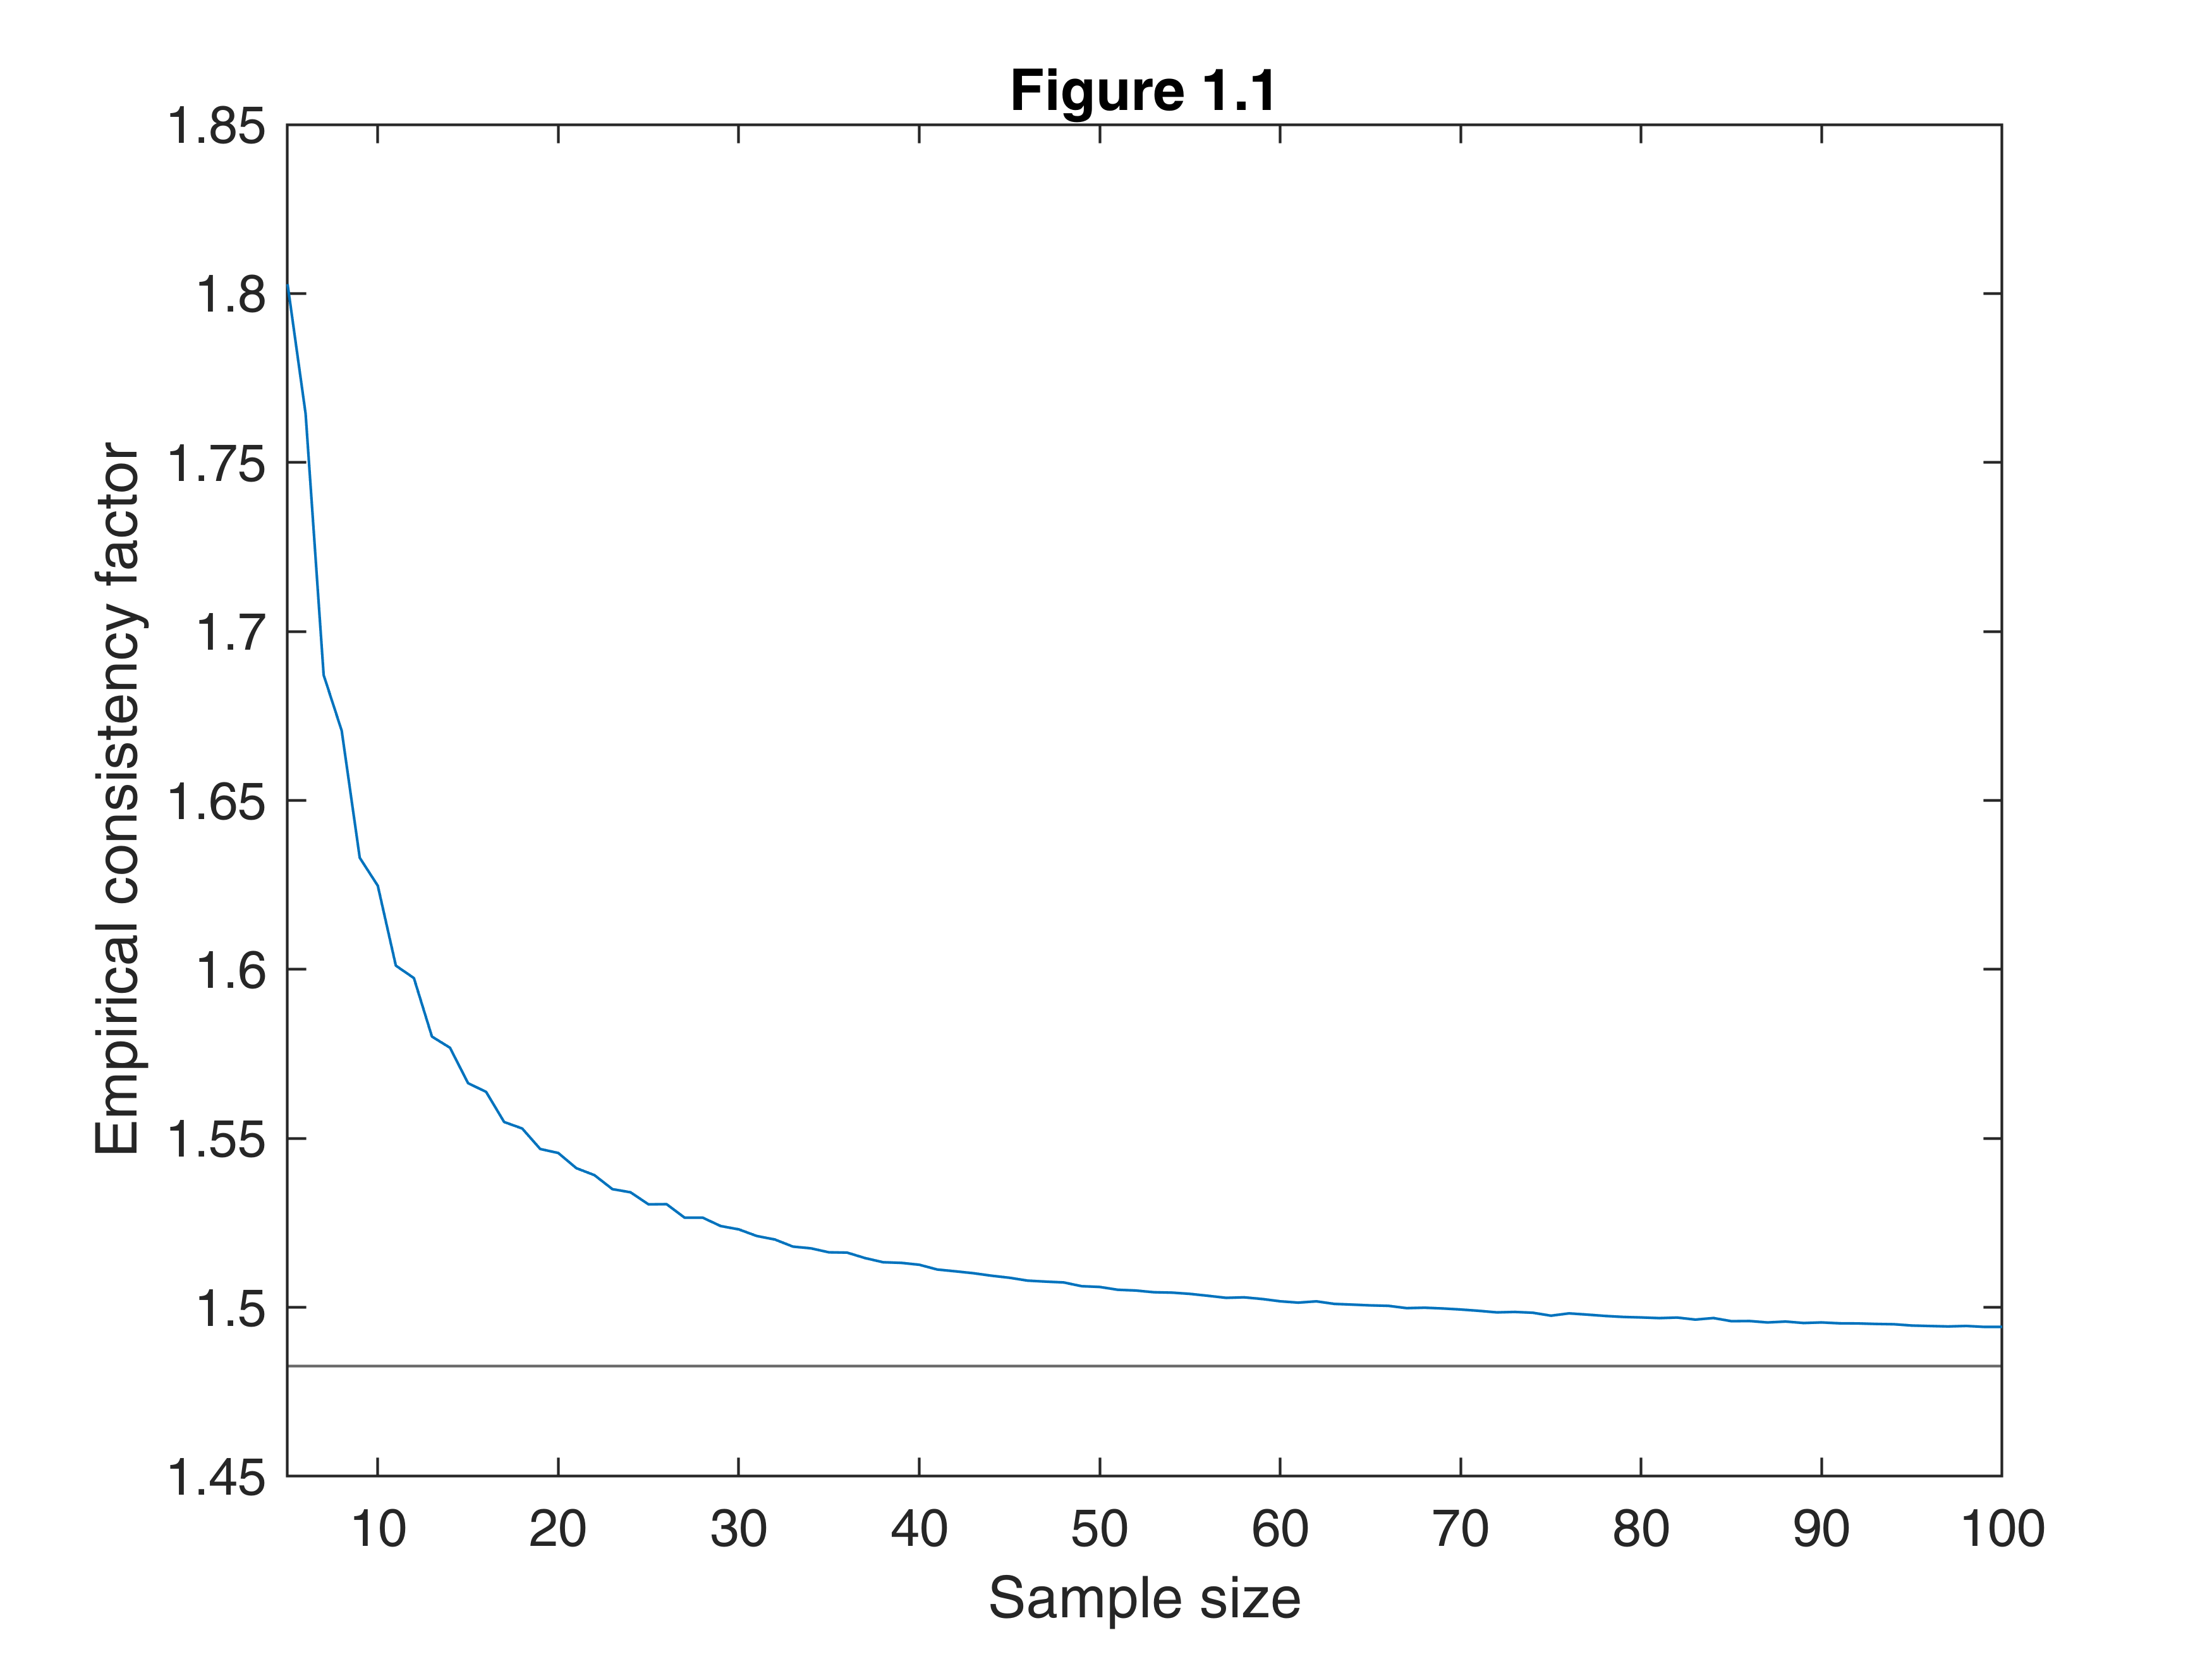

In [6]:
close all
plot(nn,1./MADall)
xlabel('Sample size')
yline(1/norminv(0.75))
xlim([minnn maxnn])
ylabel('Empirical consistency factor')
title('Figure 1.1')
set(gcf,'Name','Figure 1.1')

In [7]:

prin=0;
if prin==1
    % print to postscript
    print -depsc simMAD.eps;
end

%InsideREADME